# LangChain

- 언어 모델을 활용하여 애플리케이션 개발을 돕는 프레임워크

## LangChain 주기능

- 문맥 인식
    - 언어모델(LLM)과 소스(프롬프트, 예제, 응답의 근거)를 연동하여 사용자의 문맥을 정확하게 이해합니다.

- 추론 능력
    - 제공된 문맥에 기반해 어떤 대답을 할지, 또는 어떠한 액션을 보일지에 대한 추론이 가능합니다.

### API KEY 발급

- LangChain 프레임워크에서 LLM 모델을 사용하기 위해서는 openai의 API KEY를 발급받아야합니다. 
- [링크](https://platform.openai.com/account/api-keys)에 접속하여 **_Log in_** / **_Sign up_**
- "Create new secret key" 버튼 클릭<br> 
<center>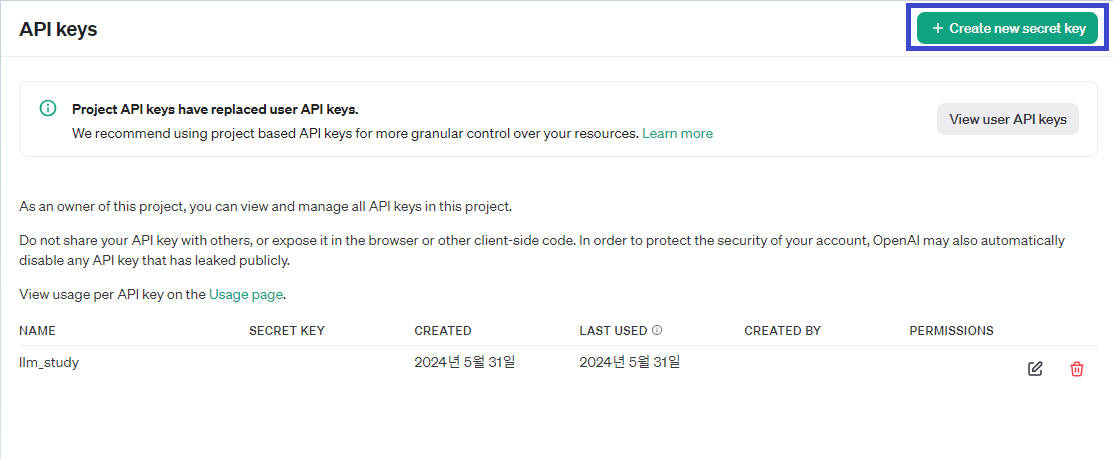</center><br>  
- Name 에는 발급하는 키에 대한 별칭을 입력하고 "Create secret key" 버튼 클릭<br> 
<center>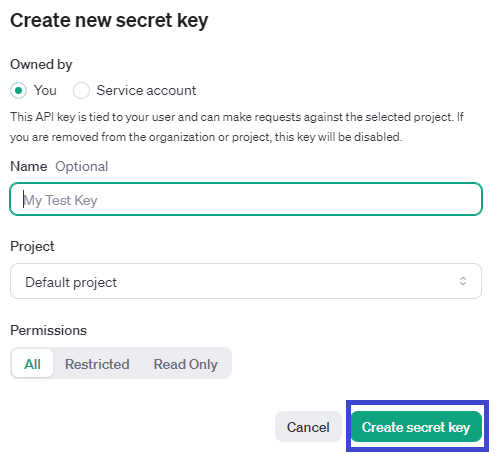</center><br> 

- 새롭게 발급한 키를 복사합니다. 잃어버리면 다시 발급받으셔야 합니다. 그리고 유출되지 않도록 안전한 곳에 저장해두셔야 합니다!<br> 
<center>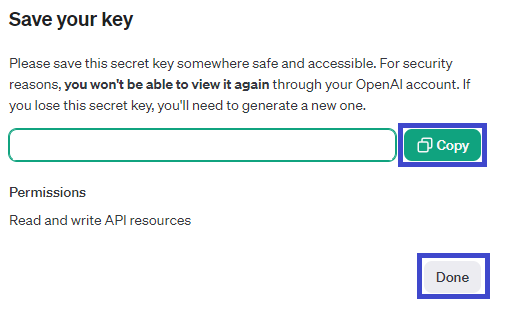</center>

In [ ]:
# 본격적으로 모듈 설치를 진행하겠습니다.

# openai, langchain 파이썬 패키지 설치
pip install openai langchain

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = '발급받은 OPENAI API KEY'

In [ ]:
# 사용 가능한 모델 리스트 확인이 가능합니다.
import openai

model_list = sorted([m['id'] for m in openai.Model.list()['data']])
for m in model_list:
    print(m)

### ChatOpenAI

- OpenAI 사의 채팅 전용 Large Language Model(llm)입니다.

#### Option

- temperature
    - 0~2 사이의 값을 선택
    - 높은 값은 출력 값을 더 랜덤하게 결정하고, 낮은 값은 집중된 값과 결정론적으로 출력합니다.
    - 즉, 높은 값은 창의적인 답변, 낮은 값은 정확한 답변 출력을 시도합니다.
    
- max_tokens
    - 채팅 완성에서 생성할 토큰의 최대 갯수
    
- model_name : 적용이 가능한 모델 리스트
    - gpt-3.5-turbo
    - gpt-3.5-turbo-0301
    - gpt-3.5-turbo-0613
    - gpt-3.5-turbo-16k
    - gpt-3.5-turbo-16k-0613
    - gpt-3.5-turbo-instruct
    - gpt-3.5-turbo-instruct-0914
    - gpt-4
    - gpt-4-0314
    - gpt-4-0613

In [ ]:
from langchain.chat_models import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(temperature=0,               # 창의성 (0.0 ~ 2.0) 
                 max_tokens=2048,             # 최대 토큰수
                 model_name='gpt-3.5-turbo',  # 모델명
                )

# 질의내용
question = '대한민국의 수도는 뭐야?'

# 질의
print(f'[답변]: {llm.predict(question)}')

### PromptTemplate

- 사용자의 입력 값을 사용하여 완전한 프롬프트 문자열을 만드는데 사용하는 템플릿입니다.

- Options
    - template: 템플릿 문자열로 이 문자열 내에서 중괄호 {}는 변수를 나타냅니다.

    - input_variables: 중괄호 안에 들어갈 변수의 이름을 리스트로 정의하고 사용되는 변수의 이름을 정의합니다.

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# 질문 템플릿 형식 정의
template = '{country}의 수도는 뭐야?'

# input_variables -> 리스트 형식으로 변수 이름을 정의
prompt = PromptTemplate(template=template, input_variables=['country'])

### LLMChain 객체

- LLMChain은 특정 PromptTemplate와 연결된 체인 객체를 생성합니다

- Options
    - prompt
        - 위에서 지정한 PromptTemplate 객체를 의미합니다.
    - llm
        - 언어 모델

In [ ]:
# Chain 객체 생성
llm_chain = LLMChain(prompt=prompt, llm=llm)

1. run() : Prompt 실행   
```
print(llm_chain.run(country='일본'))
> 일본의 수도는 도쿄입니다.

-----------------------------------

print(llm_chain.run(country='캐나다'))
> 캐나다의 수도는 오타와(Ottawa)입니다.
```

2. apply() : 여러개의 입력을 한 번에 실행 

```
input_list = [
    {'country': '호주'},
    {'country': '중국'},
    {'country': '네덜란드'}
]

llm_chain.apply(input_list)

-----------------------------------

> [{'text': '호주의 수도는 캔버라입니다.'},
 {'text': '중국의 수도는 베이징(北京)입니다.'},
 {'text': '네덜란드의 수도는 암스테르담(Amsterdam)입니다.'}]
```
리스트로 출력되는 부분을 반복문을 사용해서 결과를 확인해보겠습니다.
```
# input_list 에 대한 결과 반환
result = llm_chain.apply(input_list)

# 반복문으로 결과 출력
for res in result:
    print(res['text'].strip())

-----------------------------------

> 호주의 수도는 캔버라입니다.
중국의 수도는 베이징(北京)입니다.
네덜란드의 수도는 암스테르담(Amsterdam)입니다.
```

3. generate() : 문자열 대신에 LLMResult를 반환하는 점을 제외하고는 apply와 유사합니다. LLMResult 같은 경우 토큰 사용량과 종료 이유와 같은 유용한 생성 정보를 자주 포함하고 있습니다.

```
# input_list 에 대한 결과 반환
generated_result = llm_chain.generate(input_list)
print(generated_result)

-----------------------------------

> generations=[[ChatGeneration(text='호주의 수도는 캔버라입니다.', generation_info={'finish_reason': 'stop'}, message=AIMessage(content='호주의 수도는 캔버라입니다.', additional_kwargs={}, example=False))], [ChatGeneration(text='중국의 수도는 베이징(北京)입니다.', generation_info={'finish_reason': 'stop'}, message=AIMessage(content='중국의 수도는 베이징(北京)입니다.', additional_kwargs={}, example=False))], [ChatGeneration(text='네덜란드의 수도는 암스테르담(Amsterdam)입니다.', generation_info={'finish_reason': 'stop'}, message=AIMessage(content='네덜란드의 수도는 암스테르담(Amsterdam)입니다.', additional_kwargs={}, example=False))]] llm_output={'token_usage': {'prompt_tokens': 58, 'completion_tokens': 57, 'total_tokens': 115}, 'model_name': 'gpt-3.5-turbo'} run=[RunInfo(run_id=UUID('957a5369-a20e-470a-bcea-c325b3aafb4a')), RunInfo(run_id=UUID('f5f6f639-76f8-43e3-9103-03aa7eac6fe5')), RunInfo(run_id=UUID('f9c4ce3f-4e5d-47d5-86af-f20c077b754e'))]
```

```
generated_result.generations

-----------------------------------

[[ChatGeneration(text='호주의 수도는 캔버라입니다.', generation_info={'finish_reason': 'stop'}, message=AIMessage(content='호주의 수도는 캔버라입니다.', additional_kwargs={}, example=False))],
 [ChatGeneration(text='중국의 수도는 베이징(北京)입니다.', generation_info={'finish_reason': 'stop'}, message=AIMessage(content='중국의 수도는 베이징(北京)입니다.', additional_kwargs={}, example=False))],
 [ChatGeneration(text='네덜란드의 수도는 암스테르담(Amsterdam)입니다.', generation_info={'finish_reason': 'stop'}, message=AIMessage(content='네덜란드의 수도는 암스테르담(Amsterdam)입니다.', additional_kwargs={}, example=False))]]
```

- 토큰 사용량 출력  
```
generated_result.llm_output

-----------------------------------

> {'token_usage': {'prompt_tokens': 58,
  'completion_tokens': 57,
  'total_tokens': 115},
 'model_name': 'gpt-3.5-turbo'}
```
- run ID 출력   
```
generated_result.run

-----------------------------------

> [RunInfo(run_id=UUID('957a5369-a20e-470a-bcea-c325b3aafb4a')),
 RunInfo(run_id=UUID('f5f6f639-76f8-43e3-9103-03aa7eac6fe5')),
 RunInfo(run_id=UUID('f9c4ce3f-4e5d-47d5-86af-f20c077b754e'))]
```

- 최종 답변 출력

```
for gen in generated_result.generations:
    print(gen[0].text.strip())
    
-----------------------------------

> 호주의 수도는 캔버라입니다.
중국의 수도는 베이징(北京)입니다.
네덜란드의 수도는 암스테르담(Amsterdam)입니다.
```

4. 2개 이상의 변수를 템플릿 안에 정의 : 2개 이상의 변수를 적용하여 템플릿을 생성이 가능합니다.  
2개 이상의 변수(input_variables) 를 활용하여 템플릿 구성

```
# 질문 템플릿 형식 정의
template = '{area1} 와 {area2} 의 시차는 몇시간이야?'

# 템플릿 완성
prompt = PromptTemplate(template=template, input_variables=['area1', 'area2'])

# 연결된 체인(Chain)객체 생성
llm_chain = LLMChain(prompt=prompt, llm=llm)

print(llm_chain.run(area1='서울', area2='파리'))

-----------------------------------

> 서울과 파리의 시차는 8시간입니다. 서울이 파리보다 8시간 앞서 있습니다.
```

5. 스트리밍(Streaming) : 질의에 대한 답변을 실시간으로 받을 때 유용한 기술입니다.

- 아래와 같이 <span style="background-color:#fff5b1">streaming = True</span>로 설정하고 StreamingStdOutCallbackHandler() 을 콜백으로 지정합니다.

```
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler


# 객체 생성
llm = ChatOpenAI(temperature=0,               # 창의성 (0.0 ~ 2.0) 
                 max_tokens=2048,             # 최대 토큰수
                 model_name='gpt-3.5-turbo',  # 모델명
                 streaming=True,              
                 callbacks=[StreamingStdOutCallbackHandler()]
                )
                
question = '호주의 수도가 어디였지?'

response = llm.predict(question)
response

-----------------------------------

> 호주의 수도는 캔버라입니다 
```
